# Machine Learning

## Model-1 -Movie Rating prediction 

### Movie Rating Prediction: Select and apply suitable Machine Learning algorithm (Classification, Regression, Clustering, etc.) for movie rating prediction to determine if a movie will be a commercial success or not.

##### Import Library 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate as tabulate
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data file

movie_data=pd.read_csv("D:\\project file\\movies_datas.csv")


In [3]:
movie_data.head(5)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150.437577,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Released,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,Spectre,en,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148,Released,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165,Released,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,John Carter,en,43.926995,Walt Disney Pictures,United States of America,2012-07-03,284139100,132,Released,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,24139100


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   title                 4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4803 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4803 non-null   int64  
 11  status                4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
 14  actors                4803 non-null   object 
 15  director             

In [5]:
movie_data.shape

(4803, 17)

### Encoding with categorical column

#### 1. Genres column Encoding

In [604]:
df = movie_data.copy()  # copy of original data

In [605]:

# Split genres
df['genres'] = df['genres'].str.split(', ')

In [606]:
from sklearn.preprocessing import MultiLabelBinarizer   # use multilabel encoding to convert string to int

mlb = MultiLabelBinarizer()

In [607]:
genre_encoded = pd.DataFrame(mlb.fit_transform(df["genres"]),columns=mlb.classes_)
genre_encoded

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [608]:
df = pd.concat([df.reset_index(drop=True), genre_encoded], axis=1)  # join with actual data
df

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,en,139,Walt Disney Pictures,United States of America,2007-05-19,961000000,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[Action, Adventure, Crime]",206647,Spectre,en,107,Columbia Pictures,United Kingdom,2015-10-26,880674609,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,The Dark Knight Rises,en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[Action, Adventure, Science Fiction]",49529,John Carter,en,44,Walt Disney Pictures,United States of America,2012-07-03,284139100,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,[Documentary],25975,My Date with Drew,en,2,rusty bear entertainment,United States of America,2005-05-08,0,...,0,0,0,0,0,0,0,0,0,0
4799,15000000,[Drama],370980,Chiamatemi Francesco - Il Papa della gente,it,1,Taodue Film,Italy,2015-03-12,0,...,0,0,0,0,0,0,0,0,0,0
4800,2,[Documentary],459488,"To Be Frank, Sinatra at 100",en,0,Eyeline Entertainment,United Kingdom,2015-12-12,0,...,0,0,0,0,0,0,0,0,0,0
4801,913000,[Documentary],292539,Food Chains,de,1,Paramount Pictures,United States of America,2014-04-26,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. production_companies  column Encoding

In [609]:
top_companies = df["production_companies"].value_counts().nlargest(10).index  # Top K encoding
top_companies

Index(['Paramount Pictures', 'Universal Pictures', 'Columbia Pictures',
       'Twentieth Century Fox Film Corporation', 'New Line Cinema',
       'Walt Disney Pictures', 'Miramax Films', 'United Artists',
       'Village Roadshow Pictures', 'Columbia Pictures Corporation'],
      dtype='object', name='production_companies')

In [610]:
for company in top_companies:
    df[f"has_company_{company}"] = df["production_companies"].apply(lambda x: 1 if company in x else 0) # if production_companies is under Top show 1 else 0 
    

#### 3. original_language column Encoding

In [611]:
# en (English) has 4505 out of 4803 records → 94% of the data
# All other languages are very sparse (each <2%)

df["is_english"] = df["original_language"].apply(lambda x: 1 if x == "en" else 0) 


#### 4. production_countries column Encoding

In [612]:
# Top 10 most frequent countries
top_countries = df["production_countries"].value_counts().nlargest(10).index

# Create binary columns
for country in top_countries:
    df[f"has_country_{country}"] = df["production_countries"].apply(lambda x: 1 if country in x else 0)


#### 5. director column Encoding

In [613]:
# Top 10 most frequent directors
top_directors = df["director"].value_counts().nlargest(10).index

# Create binary columns
for director in top_directors:
    df[f"is_director_{director}"] = df["director"].apply(lambda x: 1 if x == director else 0)



#### 6. status column Encoding


In [614]:
# If status is Released show 1 else show 0

df["is_released"] = df["status"].apply(lambda x: 1 if x == "Released" else 0) # status has above 90% of the data related to Released  


#### 7. actors column Encoding

In [615]:
# Convert string to list
df['actors'] = df['actors'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Get top 10 most frequent actors
top_actors = df['actors'].explode().value_counts().nlargest(10).index


for actor in top_actors:
    df[f'has_actor_{actor.strip()}'] = df['actors'].apply(lambda x: 1 if actor in x else 0)




In [616]:
df.head(5)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,...,has_actor_Leonard Nimoy,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,Avatar,en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,...,0,0,0,0,0,0,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,en,139,Walt Disney Pictures,United States of America,2007-05-19,961000000,...,0,0,0,0,0,0,0,0,0,1
2,245000000,"[Action, Adventure, Crime]",206647,Spectre,en,107,Columbia Pictures,United Kingdom,2015-10-26,880674609,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[Action, Crime, Drama, Thriller]",49026,The Dark Knight Rises,en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,...,0,0,0,0,0,0,0,0,0,0
4,260000000,"[Action, Adventure, Science Fiction]",49529,John Carter,en,44,Walt Disney Pictures,United States of America,2012-07-03,284139100,...,0,0,0,0,0,0,0,0,0,0


#### Delete  irrelevant  columns

In [618]:
df.drop(["genres","title","id","original_language","production_companies","production_countries","release_date","actors","status","director","profit"], axis=1, inplace=True)


#### title,id-  overfitting because each ID is unique and doesn't help generalize patterns.

#### release_date-  vote_average reflects audience or critic ratings — which depend on acting, direction, story, etc., not the date the movie was released.

#### profit- The profit column is derived from budget and revenue (Profit=Revenue−Budget) might lead to data leakage.


In [619]:
df.head(2)

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,has_actor_Leonard Nimoy,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp
0,237000000,150,2787965087,162,7,11800,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139,961000000,169,7,4500,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Made a Target Column with help of vote_average(rating) column

In [620]:
M = df["vote_average"].mean()

print("mean =",M)

mean = 6.092171559442016


In [621]:
def get_rating_label(v):
    if v > M:
        return "Good"
    elif v >= M / 2 and v< M:
        return "Average"
    else:
        return "Poor"

In [622]:
df["rating_label"] = df["vote_average"].apply(get_rating_label)  # made a new column rating_label and apply function on vote_average


In [623]:
df

,budget,popularity,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,rating_label
0,237000000,150,2787965087,162,7,11800,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Good
1,300000000,139,961000000,169,7,4500,1,1,0,0,...,0,0,0,0,0,0,0,0,1,Good
2,245000000,107,880674609,148,6,4466,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Good
3,250000000,112,1084939099,165,8,9106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
4,260000000,44,284139100,132,6,2124,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,2,0,90,6,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
4799,15000000,1,0,107,7,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Good
4800,2,0,0,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Poor
4801,913000,1,0,83,7,8,0,0,0,0,...,1,1,1,1,0,0,0,0,0,Good


#### Label Encoding with new rating_label column ("Good","Average","Poor")

In [624]:
from sklearn.preprocessing import LabelEncoder

In [625]:
label_encode=LabelEncoder()

In [626]:
df["rating_label_encoded"]=label_encode.fit_transform(df["rating_label"])   # create new column rating label encoding

In [627]:
# drop vote_average,rating_label because rating_label_encoded made from this columns and its provide data leakage problem

df.drop(["vote_average","rating_label"],axis=1,inplace=True)         

In [628]:
df

,budget,popularity,revenue,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,...,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,rating_label_encoded
0,237000000,150,2787965087,162,11800,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,300000000,139,961000000,169,4500,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,245000000,107,880674609,148,4466,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,250000000,112,1084939099,165,9106,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,260000000,44,284139100,132,2124,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,2,0,90,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4799,15000000,1,0,107,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4800,2,0,0,107,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4801,913000,1,0,83,8,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1


####  log transformation for outliers 

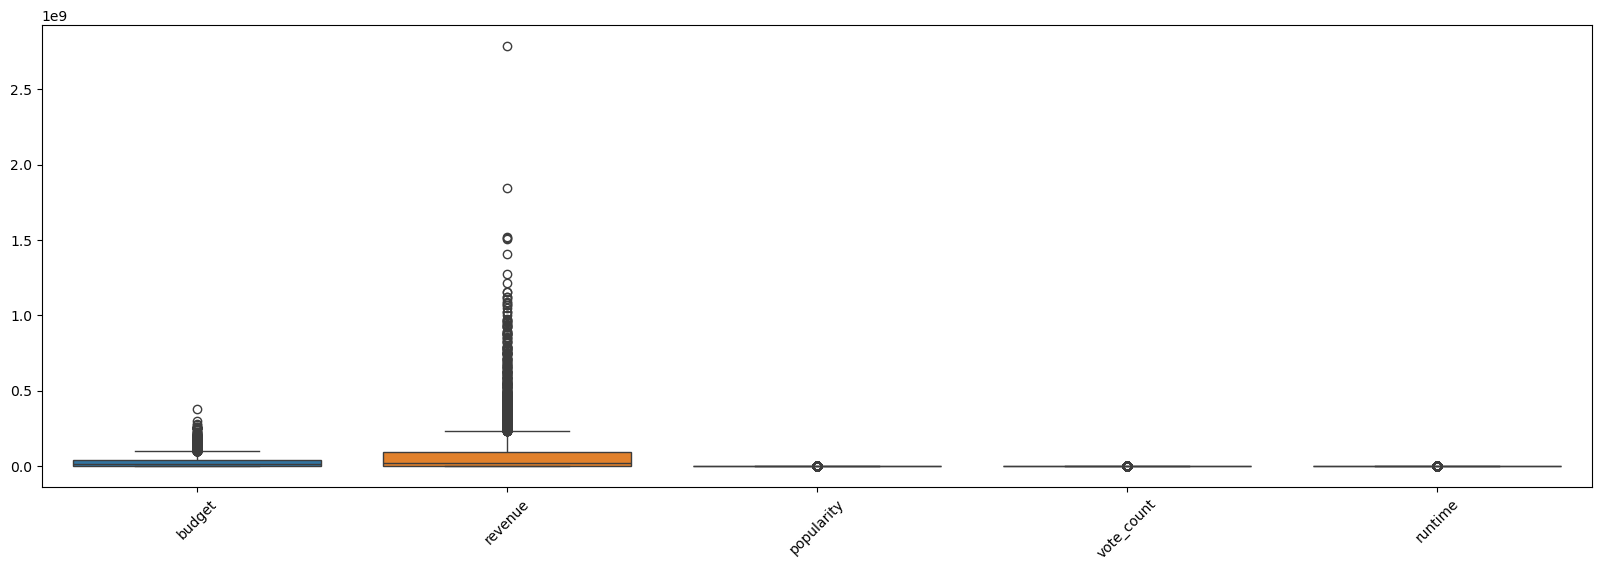

In [629]:
# First, check if outliers are present in the data using a box plot

sns.boxplot(data=df[["budget","revenue","popularity","vote_count","runtime"]])  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [630]:
import numpy as np

df["budget"] = np.log1p(df["budget"])
df["revenue"] = np.log1p(df["revenue"])
df["popularity"] = np.log1p(df["popularity"])
df["vote_count"] = np.log1p(df["vote_count"])
df["runtime"] = np.log1p(df["runtime"])

#### Reduce skewness:  Log transformation compresses large values and helps to normalize the distribution.

### Check Data Bias or Not

In [631]:
df["rating_label_encoded"].value_counts()

rating_label_encoded
1    2756
0    1946
2     101
Name: count, dtype: int64

Yes data bias towards category = 1 

In [632]:
x = df.drop("rating_label_encoded", axis=1)  # Separate Target column in Y
y = df["rating_label_encoded"]


In [633]:
# Use RandomOverSampler to control Bias

from imblearn.over_sampling import RandomOverSampler

RO = RandomOverSampler(random_state=42)


In [634]:
ro_x, ro_y = RO.fit_resample(x, y)


In [635]:
print(pd.Series(ro_y).value_counts())

rating_label_encoded
1    2756
0    2756
2    2756
Name: count, dtype: int64


### Features scaling 

In [636]:
from sklearn.preprocessing import StandardScaler  # Help  removing the mean and scaling to unit variance. Mean = 0/Standard deviation = 1


In [637]:
scale=StandardScaler()

In [638]:
scale_data=scale.fit_transform(ro_x)

In [639]:
scale_data=pd.DataFrame(scale_data,columns=x.columns)
scale_data

,budget,popularity,revenue,runtime,vote_count,Action,Adventure,Animation,Comedy,Crime,...,has_actor_Leonard Nimoy,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp
0,1,2,2,3,2,2,3,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
1,1,2,1,3,2,2,3,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,17
2,1,2,1,2,2,2,3,-0,-1,3,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
3,1,2,1,3,2,2,-0,-0,-1,3,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
4,1,1,1,1,1,2,3,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8263,-1,-1,-1,-1,-1,-1,-0,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
8264,1,-1,-1,-0,-0,-1,3,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
8265,-1,-1,-1,-2,-1,-1,-0,-0,-1,-0,...,3,3,3,3,3,-0,-0,-0,-0,-0
8266,-1,-1,-1,0,-1,-1,-0,-0,-1,-0,...,3,3,3,3,3,-0,-0,-0,-0,-0


### Feature Selection-  Detect multicollinearity 

In [640]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [641]:
def calculate_vif(x):
    vif=pd.Series(name="VIF")
    for i in range(0,x.shape[1]):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [642]:
dm=scale_data

In [643]:
vif_values=calculate_vif(dm.copy())

In [644]:
vif_values[0:60]

budget                                                 3
popularity                                            16
revenue                                                4
runtime                                                2
vote_count                                            17
Action                                                 1
Adventure                                              1
Animation                                              2
Comedy                                                 2
Crime                                                  1
Documentary                                            2
Drama                                                  2
Family                                                 2
Fantasy                                                1
Foreign                                                1
History                                                1
Horror                                                 1
Music                          

In [645]:
vif_values[60:70]

has_actor_DeForest Kelley     inf
has_actor_James Doohan        inf
has_actor_Bruce Willis          1
has_actor_Robert De Niro        1
has_actor_Samuel L. Jackson     1
has_actor_Nicolas Cage          1
has_actor_Johnny Depp           1
Name: VIF, dtype: float64

Delete those columns have greater than 10 VIF score because VIF > 10 → Serious multicollinearity

In [646]:
scale_data.drop(["has_actor_Leonard Nimoy","has_actor_George Takei","has_actor_DeForest Kelley","has_actor_James Doohan","vote_count"],axis=1,inplace=True)

In [647]:
# Check VIF score again After delete columns

In [648]:
dml=scale_data

In [649]:
vif_values=calculate_vif(dml.copy())

In [650]:
vif_values[0:60]

budget                                               3
popularity                                           4
revenue                                              3
runtime                                              2
Action                                               1
Adventure                                            1
Animation                                            2
Comedy                                               1
Crime                                                1
Documentary                                          2
Drama                                                2
Family                                               2
Fantasy                                              1
Foreign                                              1
History                                              1
Horror                                               1
Music                                                1
Mystery                                              1
Romance   

### Data splitting

In [651]:
from sklearn.model_selection import train_test_split

In [652]:
x_train,x_test,y_train,y_test=train_test_split(scale_data,ro_y,test_size=0.2,random_state=42)

### Build Model Logistic Regression 

In [653]:
from  sklearn.linear_model import LogisticRegression

In [654]:
model1=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [655]:
model1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [656]:
# model prediction

y_predic=model1.predict(x_test)
y_predic

array([1, 0, 2, ..., 2, 1, 2])

Using the trained model to predict the outcome of the X_Test dataset


### Model Evaluation

####  Confusion matrix

In [657]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_predic))




[[323 142  85]
 [135 373  25]
 [ 25   0 546]]


In [658]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [659]:
print('accuracy:', accuracy_score(y_test, y_predic))
print('recall:', recall_score(y_test, y_predic, average='weighted'))
print('f1-score:', f1_score(y_test, y_predic, average='weighted'))
print('precision:', precision_score(y_test, y_predic, average='weighted'))

accuracy: 0.750906892382104
recall: 0.750906892382104
f1-score: 0.7445781069228834
precision: 0.7431047914190724


### Interpretation

#### 0 Average , 1 Good,  2 poor

 Overall Accuracy is 75%, which is reasonable and indicates that the model is correctly predicting 3 out of 4 test samples.

Class 2 means (Poor) is predicted very well:

Out of 571 actual class-2 instances, 546 were correctly predicted.

Very few misclassifications (high recall for class 2).

Confusion Between Class 0 and 1:

The model often confuses class 0 with 1 and vice versa.

For example:

142 class-0 samples were misclassified as class-1.

135 class-1 samples were misclassified as class-0.

 Precision & Recall Tradeoff:

Precision (74.3%): About 74% of the predicted labels were correct.

Recall (75%): The model is good at finding most of the actual class instances.

F1-score (74.4%): Shows a good balance between precision and recall.

### For More Accuracy go with alternate model K-Nearest Neighbor (Alogorithm)

#### Find K value 

In [660]:
from sklearn.neighbors import KNeighborsClassifier
import joblib
joblib.parallel_backend('loky', n_jobs=1)  

In [661]:
error_rate=[]
for i in range(1,16):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print(i,model.score(x_train,y_train)*100,model.score(x_test,y_test)*100)
    y_predic=model.predict(x_test)
    error_rate.append(np.mean(y_predic!=y_test))

1 100.0 82.10399032648125
2 89.29543392803146 79.44377267230955
3 89.09888116117327 79.14147521160822
4 85.71212579377078 78.23458282950423
5 85.30390081644995 77.7509068923821
6 83.08134260659207 77.56952841596132
7 82.85455095252495 76.90447400241838
8 81.1611732688237 76.29987908101572
9 80.46567886301784 75.81620314389359
10 79.37707892349562 75.69528415961307
11 79.67946779558513 75.57436517533253
12 79.15028726942849 74.9093107617896
13 78.8327789537345 74.42563482466747
14 78.16752343513758 74.24425634824668
15 77.92561233746598 74.18379685610641


In [662]:
error_rate

[0.17896009673518742,
 0.20556227327690446,
 0.20858524788391777,
 0.21765417170495768,
 0.22249093107617895,
 0.22430471584038694,
 0.2309552599758162,
 0.2370012091898428,
 0.2418379685610641,
 0.2430471584038694,
 0.24425634824667472,
 0.250906892382104,
 0.25574365175332525,
 0.25755743651753327,
 0.2581620314389359]

#### K= 3 (89.09888116117327 79.14147521160822) 

### K-Nearest Neighbor Model

In [663]:
model2=KNeighborsClassifier(n_neighbors=3)

In [664]:
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [665]:
y_pre1=model2.predict(x_test)

### Model Evaluation

#### confusion_matrix

In [666]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pre1))

[[397 141  12]
 [179 341  13]
 [  0   0 571]]


In [667]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [668]:
print('accuracy:', accuracy_score(y_test, y_pre1))
print('recall:', recall_score(y_test, y_pre1, average='weighted'))
print('f1-score:', f1_score(y_test, y_pre1, average='weighted'))
print('precision:', precision_score(y_test, y_pre1, average='weighted'))

accuracy: 0.7914147521160823
recall: 0.7914147521160823
f1-score: 0.7888360387436912
precision: 0.7879138039252132


### Interpretation

We built a Machine Learning model to predict movie ratings in order to assess whether a movie is likely to be a commercial success or not.

Model Performance Summary:

Accuracy: 79.14%
The model correctly predicts movie success categories nearly 8 out of 10 times, showing strong reliability in a business context.

Precision: 78.79%
Among all movies predicted to be successful, about 79% were actually successful, which reduces the risk of overestimating success.

Recall: 79.14%
The model successfully identifies about 79% of all actual successful movies, meaning it captures a high portion of truly successful films.

F1-Score: 78.88%
This balance between precision and recall indicates the model is well-tuned for consistent predictions across movie types.

Confusion Matrix Overview:

The model is extremely accurate in predicting high-rated movies (571 correct, 0 wrong).

Some overlap exists between Low and Medium categories, where ~141 low-rated movies are misclassified as medium, and vice versa (~179).

Implications for Business Decisions:

Studio executives and producers can confidently use this model for early-stage decisions like greenlighting scripts, budgeting, and marketing spend.

The high confidence in identifying top-rated movies allows prioritizing those for premium release windows or international markets.

model Access Link- https://movie-rating-predictor-n7eg.onrender.com/



#### K-Nearest Neighbor (Alogorithm) is Best for Movie Rating Prediction 79% Accuracy and Easily find Poor rating movies

# Machine Learning

## Model-2 Revenue prediction 

### Revenue prediction: Select and apply suitable Machine Learning algorithm (Classification, Regression, Clustering, etc.) for predicting the revenue earned by a movie, based on appropriate factors/features available in the data.

In [275]:
movie_data

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150.437577,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Released,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,Spectre,en,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148,Released,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165,Released,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,John Carter,en,43.926995,Walt Disney Pictures,United States of America,2012-07-03,284139100,132,Released,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,Documentary,25975,My Date with Drew,en,1.929883,rusty bear entertainment,United States of America,2005-05-08,0,90,Released,6.3,16,"Drew Barrymore, Brian Herzlinger, Corey Feldma...",Brian Herzlinger,0
4799,15000000,Drama,370980,Chiamatemi Francesco - Il Papa della gente,it,0.738646,Taodue Film,Italy,2015-03-12,0,107,Released,7.3,12,Rodrigo de la Serna,Daniele Luchetti,-15000000
4800,2,Documentary,459488,"To Be Frank, Sinatra at 100",en,0.050625,Eyeline Entertainment,United Kingdom,2015-12-12,0,107,Released,0.0,0,Tony Oppedisano,Simon Napier-Bell,-2
4801,913000,Documentary,292539,Food Chains,de,0.795698,Paramount Pictures,United States of America,2014-04-26,0,83,Released,7.4,8,"William Shatner, Leonard Nimoy, DeForest Kelle...",Sanjay Rawal,-913000


In [368]:
dk = movie_data.copy()

### Delete irrelevant columns

In [369]:
dk.drop(["id","title","production_countries","profit","status"],axis=1,inplace=True)

##### title,id- overfitting because each ID is unique and doesn't help generalize patterns.

##### production_countries- It overlaps with original_language and sometimes production_companies

##### profit- The profit column is derived from budget and revenue (Profit=Revenue−Budget) might lead to data leakage.

##### status- Usually "Released", not informative unless you're using unreleased data.
                

## Encoding with categorical column

### 1. Genres column Encoding

In [370]:
 #split genres in a different columns

# Split genres
dk['genres'] = dk['genres'].str.split(', ')

In [371]:
from sklearn.preprocessing import MultiLabelBinarizer   # use multilabel encoding to convert string to int

mlb1 = MultiLabelBinarizer()


In [372]:
genre_encoded1 = pd.DataFrame(mlb1.fit_transform(dk["genres"]),columns=mlb1.classes_)
genre_encoded1

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [373]:
dk = pd.concat([dk.reset_index(drop=True), genre_encoded1], axis=1)  # join with actual data
dk

,budget,genres,original_language,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150,Ingenious Film Partners,2009-10-12,2787965087,162,7,11800,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[Adventure, Fantasy, Action]",en,139,Walt Disney Pictures,2007-05-19,961000000,169,7,4500,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[Action, Adventure, Crime]",en,107,Columbia Pictures,2015-10-26,880674609,148,6,4466,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[Action, Crime, Drama, Thriller]",en,112,Legendary Pictures,2012-07-16,1084939099,165,8,9106,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[Action, Adventure, Science Fiction]",en,44,Walt Disney Pictures,2012-07-03,284139100,132,6,2124,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,[Documentary],en,2,rusty bear entertainment,2005-05-08,0,90,6,16,...,0,0,0,0,0,0,0,0,0,0
4799,15000000,[Drama],it,1,Taodue Film,2015-03-12,0,107,7,12,...,0,0,0,0,0,0,0,0,0,0
4800,2,[Documentary],en,0,Eyeline Entertainment,2015-12-12,0,107,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,913000,[Documentary],de,1,Paramount Pictures,2014-04-26,0,83,7,8,...,0,0,0,0,0,0,0,0,0,0


### 2. production_companies column Encoding


In [374]:
top_companies1 = dk["production_companies"].value_counts().nlargest(10).index  # Top K encoding
top_companies1

Index(['Paramount Pictures', 'Universal Pictures', 'Columbia Pictures',
       'Twentieth Century Fox Film Corporation', 'New Line Cinema',
       'Walt Disney Pictures', 'Miramax Films', 'United Artists',
       'Village Roadshow Pictures', 'Columbia Pictures Corporation'],
      dtype='object', name='production_companies')

In [375]:
for company in top_companies1:
    dk[f"has_company_{company}"] = dk["production_companies"].apply(lambda x: 1 if company in x else 0) # if production_companies is under Top show 1 else 0 


### 3. original_language column Encoding¶


In [376]:
# en (English) has 4505 out of 4803 records → 94% of the data
# All other languages are very sparse (each <2%)

dk["is_english"] = dk["original_language"].apply(lambda x: 1 if x == "en" else 0)

### 4. director column Encoding


In [377]:
# Top 10 most frequent directors
top_directors1 = dk["director"].value_counts().nlargest(10).index


# Create binary columns
for director in top_directors1:
    dk[f"is_director_{director}"] = dk["director"].apply(lambda x: 1 if x == director else 0)



### 5. actors column Encoding

In [378]:
# Convert string to list
dk['actors'] = dk['actors'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Get top 10 most frequent actors
top_actors1 = dk['actors'].explode().value_counts().nlargest(10).index


In [379]:
for actor in top_actors1:
    dk[f'has_actor_{actor.strip()}'] = dk['actors'].apply(lambda x: 1 if actor in x else 0)

### 6. release_date column Encoding

In [380]:
dk['release_date'] = pd.to_datetime(dk['release_date'], errors='coerce')  # change to datetime data types

In [381]:
dk['release_month'] = dk['release_date'].dt.month  # extract month


##### cyclical encoding with sine and cosine

In [382]:
dk['month_sin'] = np.sin(2 * np.pi * dk['release_month'] / 12)
dk['month_cos'] = np.cos(2 * np.pi * dk['release_month'] / 12)
dk.drop('release_month', axis=1, inplace=True)

##### After December (12) comes January (1) , But numerically, 12 and 1 seem far apart.

#### The idea is to map months to positions on a circle, like hours on a clock

#### angle = 2π * month / 12 

#### sin(angle) → Y position on the circle
#### cos(angle) → X position on the circle

#### These two values (sin, cos) together represent the position of the month in the cycle.








In [383]:
pd.set_option('display.float_format', '{:,.0f}'.format) # to use for correct format of Table


In [384]:
dk.head()

,budget,genres,original_language,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,month_sin,month_cos
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",en,150,Ingenious Film Partners,2009-10-12,2787965087,162,7,11800,...,0,0,0,0,0,0,0,0,-1,1
1,300000000,"[Adventure, Fantasy, Action]",en,139,Walt Disney Pictures,2007-05-19,961000000,169,7,4500,...,0,0,0,0,0,0,0,1,0,-1
2,245000000,"[Action, Adventure, Crime]",en,107,Columbia Pictures,2015-10-26,880674609,148,6,4466,...,0,0,0,0,0,0,0,0,-1,1
3,250000000,"[Action, Crime, Drama, Thriller]",en,112,Legendary Pictures,2012-07-16,1084939099,165,8,9106,...,0,0,0,0,0,0,0,0,-0,-1
4,260000000,"[Action, Adventure, Science Fiction]",en,44,Walt Disney Pictures,2012-07-03,284139100,132,6,2124,...,0,0,0,0,0,0,0,0,-0,-1


In [386]:
# drop Categorical column

dk.drop(["genres","original_language","production_companies","director","release_date","actors"], axis=1, inplace=True)


### log transformation for outeliers

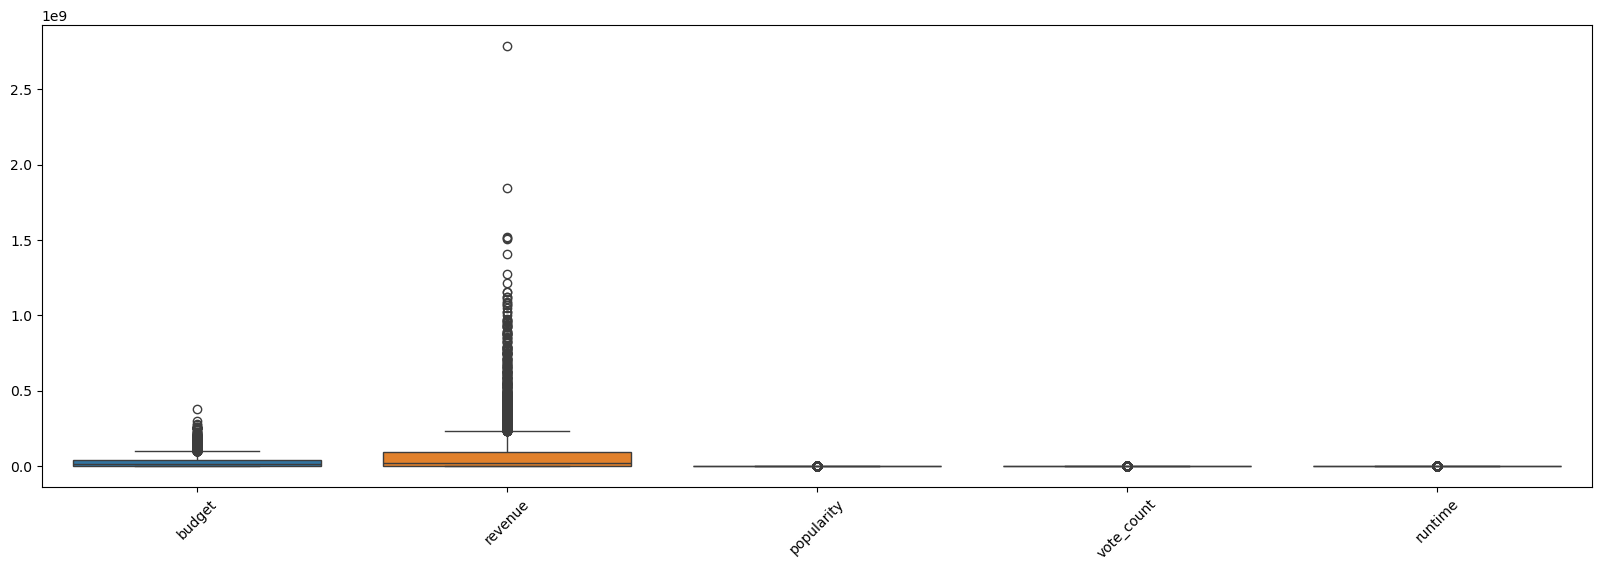

In [387]:
sns.boxplot(data=dk[["budget","revenue","popularity","vote_count","runtime"]])  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [388]:
import numpy as np

dk["budget"] = np.log1p(dk["budget"])
dk["runtime"] = np.log1p(dk["runtime"])
dk["popularity"] = np.log1p(dk["popularity"])
dk["vote_count"] = np.log1p(dk["vote_count"])
dk["revenue"] = np.log1p(dk["revenue"])

##### Log Transform the Target (revenue)?

##### Reduces impact of outliers

##### Revenue ranges from 0 to billions — highly skewed.

##### Log-transform compresses large values and smooths the distribution.

##### Improves model performance ( without change this revenue to log model give 38% accuracy  and after apply log model give 60% accuracy)

### Features scaling 


In [389]:
from sklearn.preprocessing import StandardScaler  # Help  removing the mean and scaling to unit variance. Mean = 0/Standard deviation = 1

In [390]:
x1 = dk.drop("revenue", axis=1)
y1 = dk["revenue"]


In [391]:
scale=StandardScaler()

In [392]:
scale_data1=scale.fit_transform(x1)

In [393]:
scale_data1=pd.DataFrame(scale_data1,columns=x1.columns)
scale_data1

,budget,popularity,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,...,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,month_sin,month_cos
0,1,2,2,1,2,2,2,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
1,1,2,2,1,2,2,2,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,13,1,-1
2,1,2,2,0,2,2,2,-0,-1,2,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
3,1,2,2,1,2,2,-0,-0,-1,2,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
4,1,1,1,0,1,2,2,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,-2,-1,-1,0,-1,-1,-0,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
4799,1,-2,0,1,-1,-1,-0,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,2,-0
4800,-2,-2,0,-5,-3,-1,-0,-0,-1,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,0,1
4801,0,-2,-1,1,-2,-1,-0,-0,-1,-0,...,10,10,10,-0,-0,-0,-0,-0,1,-1


### Feature Selection- Detect multicollinearity

In [394]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [395]:
def calculate_vif(x):
    vif=pd.Series(name="VIF")
    for i in range(0,x.shape[1]):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [396]:
dg=scale_data1

In [397]:
vif_values1=calculate_vif(dg.copy())

In [398]:
print(vif_values1)

budget                                                 2
popularity                                            11
runtime                                                2
vote_average                                           2
vote_count                                            13
Action                                                 2
Adventure                                              1
Animation                                              2
Comedy                                                 2
Crime                                                  1
Documentary                                            1
Drama                                                  2
Family                                                 2
Fantasy                                                1
Foreign                                                1
History                                                1
Horror                                                 1
Music                          

In [399]:
scale_data1.drop(["vote_count","has_actor_George Takei","has_actor_DeForest Kelley","has_actor_James Doohan","has_actor_Leonard Nimoy"], axis=1, inplace=True)


In [400]:
# Check again after delete multicollinearity columns

In [401]:
dgl=scale_data1

In [402]:
vif_values1=calculate_vif(dgl.copy())

In [403]:
print(vif_values1)

budget                                               2
popularity                                           2
runtime                                              2
vote_average                                         2
Action                                               2
Adventure                                            1
Animation                                            2
Comedy                                               2
Crime                                                1
Documentary                                          1
Drama                                                2
Family                                               2
Fantasy                                              1
Foreign                                              1
History                                              1
Horror                                               1
Music                                                1
Mystery                                              1
Romance   

### Data splitting

In [404]:
from sklearn.model_selection import train_test_split

In [405]:
x_train1,x_test1,y_train1,y_test1=train_test_split(scale_data1,y1,test_size=0.2,random_state=100)

### Build Model Multi- Linear Regression 

In [406]:
from sklearn.linear_model import LinearRegression

In [407]:
model3 = LinearRegression()


In [408]:
model3.fit(x_train1,y_train1)

LinearRegression()

In [409]:
print('slope:', model3.coef_)

slope: [ 3.67307676e+00  3.13643008e+00  3.25693601e-01  1.89816400e-01
 -3.76478015e-03 -1.08504844e-02 -6.01212030e-02 -9.58642021e-02
 -8.43419132e-02  1.14964918e-01 -3.52672771e-01  8.91760486e-02
 -2.25858813e-01  6.75985526e-02 -5.72768347e-02 -1.81868838e-01
  1.01176905e-01 -3.78821905e-02  6.33822662e-02 -6.59972935e-02
 -1.34931665e-01 -1.57411305e-01  1.13068732e-01 -6.60849566e-02
  1.83406057e-01  2.31834268e-01  8.54420474e-02  3.66703250e-01
  2.59963312e-01  4.34836250e-02 -3.81494154e-02  2.06347208e-01
  8.70314494e-02  1.46434352e-01  2.65867454e-01  9.98915343e-02
 -1.69028774e-01  1.57882842e-01  7.53849300e-04 -2.94839631e-03
  2.12222311e-02  7.57238229e-02  1.02183839e-01  5.12619098e-02
  3.04857675e-02  2.94333990e-05 -1.09652326e-01 -6.22337459e-02
 -6.93372452e-02 -7.07659533e-03 -4.09621780e-02 -1.76816327e-01
 -4.25194822e-02]


In [410]:
print('Intercept: \n', model3.intercept_)


Intercept: 
 12.221031649791877


In [411]:
y_predic2=model3.predict(x_test1)

### Evaluating the model performance

In [412]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [413]:
MSE=mean_squared_error(y_test1,y_predic2)
MAE=mean_absolute_error(y_test1,y_predic2)
RMSE = mean_squared_error(y_test1,y_predic2, squared=False)
print(MSE, MAE, RMSE)

26.460824369753563 3.5478301105883925 5.144008589587848


In [414]:
# R2 Score
r2 = r2_score(y_test1,y_predic2)*100
print(f"The R2 score of the model is", r2)

The R2 score of the model is 60.27635973398146


### Interpretation

We developed a machine learning model to predict movie revenue based on features such as budget, genre, popularity, runtime, etc.

Model Performance Overview:

R² Score: 60.28%
This means that the model can explain approximately 60% of the variability in movie revenues using the given input features. It provides a reasonably good fit for business-level forecasting, though there’s room for improvement.

Error Metrics:

Mean Squared Error (MSE): 26.46
Indicates the average squared difference between actual and predicted revenue (in unit squared format).

Mean Absolute Error (MAE): 3.55
On average, our predictions deviate by about 3.55 units (likely in million/billion depending on your unit scale).

Root Mean Squared Error (RMSE): 5.14
Suggests that typical prediction errors are around 5.14 units, giving us a sense of the model’s standard prediction error.


##### The model is suitable for high-level forecasting, allowing studios and producers to estimate potential movie revenue before release.

##### It helps in budget allocation, ROI estimation, and risk assessment based on predictive insights.

##### Further refinement (e.g., feature engineering or advanced models) can improve accuracy for more critical financial decisions.


# Machine Learning

## Model-3 :  Genre prediction 

### Categorization of movies based on genre: Select and apply suitable Machine Learning algorithm (Classification, Regression, Clustering, etc.) for categorizing movies by genre, such as animated, action, thriller, etc.

In [217]:
dp = movie_data.copy()

In [218]:
dp["genres"].value_counts()  # There is 1174 columns unique column so we need to split

genres
Drama                                         398
Comedy                                        282
Drama, Romance                                164
Comedy, Romance                               144
Comedy, Drama                                 142
                                             ... 
Adventure, Action, Comedy, Romance              1
Action, Fantasy, Science Fiction, Thriller      1
Science Fiction, Comedy, Adventure              1
Drama, Thriller, Horror                         1
Comedy, Drama, Romance, TV Movie                1
Name: count, Length: 1174, dtype: int64

In [219]:
dp.head(5)

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Released,7,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,Spectre,en,107,Columbia Pictures,United Kingdom,2015-10-26,880674609,148,Released,6,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,165,Released,8,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,John Carter,en,44,Walt Disney Pictures,United States of America,2012-07-03,284139100,132,Released,6,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,24139100


### Delete irrelevant columns

In [220]:
dp.drop(["production_countries","id","title","status","profit"],axis=1,inplace=True)

##### title,id- overfitting because each ID is unique and doesn't help generalize patterns.

##### status- Usually "Released", not informative unless you're using unreleased data.

##### production_countries- It overlaps with original_language and sometimes production_companies

##### profit- The profit column is derived from budget and revenue (Profit=Revenue−Budget) might lead to data leakage.

### Encoding with categorical column


#### Genres Target column Encoding

In [221]:
dp['genres'] = dp['genres'].str.replace(" ", "")


In [222]:
dp['main_genre'] = dp['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) and isinstance(x, str) else None)


In [223]:
dp["main_genre"].unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'ScienceFiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TVMovie', 'Foreign'], dtype=object)

In [224]:
from sklearn.preprocessing import LabelEncoder

In [225]:
label_encoder=LabelEncoder()

In [226]:
dp["target_genres"]=label_encoder.fit_transform(dp["main_genre"])

In [227]:
dp

,budget,genres,original_language,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,actors,director,main_genre,target_genres
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",en,150,Ingenious Film Partners,2009-10-12,2787965087,162,7,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,Action,0
1,300000000,"Adventure,Fantasy,Action",en,139,Walt Disney Pictures,2007-05-19,961000000,169,7,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,Adventure,1
2,245000000,"Action,Adventure,Crime",en,107,Columbia Pictures,2015-10-26,880674609,148,6,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,Action,0
3,250000000,"Action,Crime,Drama,Thriller",en,112,Legendary Pictures,2012-07-16,1084939099,165,8,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,Action,0
4,260000000,"Action,Adventure,ScienceFiction",en,44,Walt Disney Pictures,2012-07-03,284139100,132,6,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,Action,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,Documentary,en,2,rusty bear entertainment,2005-05-08,0,90,6,16,"Drew Barrymore, Brian Herzlinger, Corey Feldma...",Brian Herzlinger,Documentary,5
4799,15000000,Drama,it,1,Taodue Film,2015-03-12,0,107,7,12,Rodrigo de la Serna,Daniele Luchetti,Drama,6
4800,2,Documentary,en,0,Eyeline Entertainment,2015-12-12,0,107,0,0,Tony Oppedisano,Simon Napier-Bell,Documentary,5
4801,913000,Documentary,de,1,Paramount Pictures,2014-04-26,0,83,7,8,"William Shatner, Leonard Nimoy, DeForest Kelle...",Sanjay Rawal,Documentary,5


#### 2. production_companies column Encoding


In [228]:
top_companies2 = dp["production_companies"].value_counts().nlargest(10).index  # Top K encoding
top_companies2

Index(['Paramount Pictures', 'Universal Pictures', 'Columbia Pictures',
       'Twentieth Century Fox Film Corporation', 'New Line Cinema',
       'Walt Disney Pictures', 'Miramax Films', 'United Artists',
       'Village Roadshow Pictures', 'Columbia Pictures Corporation'],
      dtype='object', name='production_companies')

In [229]:
for company in top_companies2:
    dp[f"has_company_{company}"] = dp["production_companies"].apply(lambda x: 1 if company in x else 0) # if production_companies is under Top show 1 else 0 
    

#### 3. original_language column Encoding

In [230]:
dp["is_english"] = dp["original_language"].apply(lambda x: 1 if x == "en" else 0) 


#### 4. director column Encoding


In [231]:
# Top 10 most frequent directors
top_directors2 = dp["director"].value_counts().nlargest(10).index

# Create binary columns
for director in top_directors2:
    dp[f"is_director_{director}"] = dp["director"].apply(lambda x: 1 if x == director else 0)

#### 5. actors column Encoding

In [232]:
# Convert string to list
dp['actors'] = dp['actors'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Get top 10 most frequent actors
top_actors2 = dp['actors'].explode().value_counts().nlargest(10).index


for actor in top_actors2:
    dp[f'has_actor_{actor.strip()}'] = dp['actors'].apply(lambda x: 1 if actor in x else 0)

#### 6. release_date column Encoding


In [233]:
dp['release_date'] = pd.to_datetime(dp['release_date'], errors='coerce')  # change to datetime data types

In [234]:
dp['release_month'] = dp['release_date'].dt.month  # extract month

In [235]:
dp.head(2)

,budget,genres,original_language,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,has_actor_George Takei,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,release_month
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",en,150,Ingenious Film Partners,2009-10-12,2787965087,162,7,11800,...,0,0,0,0,0,0,0,0,0,10
1,300000000,"Adventure,Fantasy,Action",en,139,Walt Disney Pictures,2007-05-19,961000000,169,7,4500,...,0,0,0,0,0,0,0,0,1,5


#### cyclical encoding with sine and cosine

In [236]:
dp['month_sin'] = np.sin(2 * np.pi * dp['release_month'] / 12)
dp['month_cos'] = np.cos(2 * np.pi * dp['release_month'] / 12)
dp.drop('release_month', axis=1, inplace=True)

###### After December (12) comes January (1) , But numerically, 12 and 1 seem far apart.
    
###### The idea is to map months to positions on a circle, like hours on a clock

###### angle = 2π * month / 12

######  sin(angle) → Y position on the circle

###### cos(angle) → X position on the circle

###### These two values (sin, cos) together represent the position of the month in the cycle.


In [237]:
pd.set_option('display.float_format', '{:,.0f}'.format) # to use for correct format of Table


In [238]:
dp.head(4)

,budget,genres,original_language,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count,...,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,month_sin,month_cos
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",en,150,Ingenious Film Partners,2009-10-12,2787965087,162,7,11800,...,0,0,0,0,0,0,0,0,-1,1
1,300000000,"Adventure,Fantasy,Action",en,139,Walt Disney Pictures,2007-05-19,961000000,169,7,4500,...,0,0,0,0,0,0,0,1,0,-1
2,245000000,"Action,Adventure,Crime",en,107,Columbia Pictures,2015-10-26,880674609,148,6,4466,...,0,0,0,0,0,0,0,0,-1,1
3,250000000,"Action,Crime,Drama,Thriller",en,112,Legendary Pictures,2012-07-16,1084939099,165,8,9106,...,0,0,0,0,0,0,0,0,-0,-1


### drop Categorical column


In [239]:
dp.drop(["actors","genres","original_language","production_companies","director","release_date","main_genre"], axis=1, inplace=True)


### Seprate Data x and y variable

In [241]:
x2=dp.drop("target_genres",axis=1)
y2=dp["target_genres"]

### log transformation for outeliers

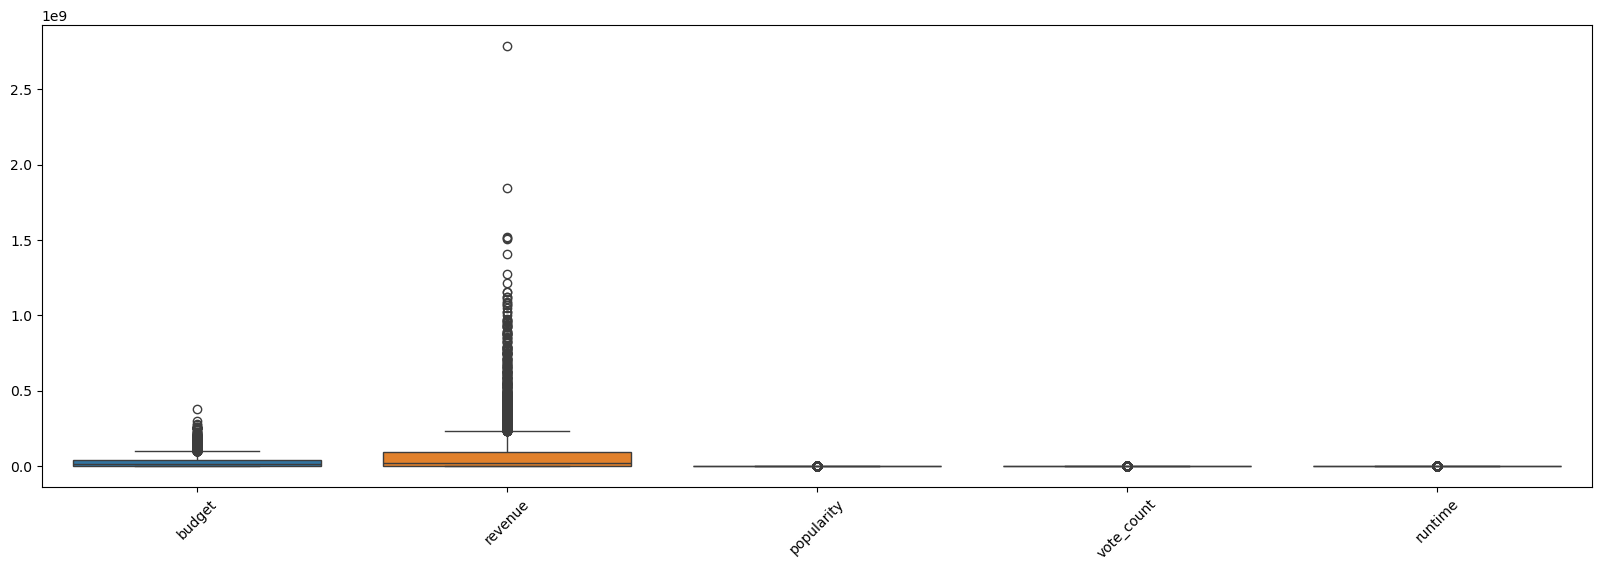

In [242]:
sns.boxplot(data=x2[["budget","revenue","popularity","vote_count","runtime"]])  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [243]:
import numpy as np

x2["budget"] = np.log1p(x2["budget"])
x2["runtime"] = np.log1p(x2["runtime"])
x2["popularity"] = np.log1p(x2["popularity"])
x2["vote_count"] = np.log1p(x2["vote_count"])
x2["revenue"] = np.log1p(x2["revenue"])

#### Reduce skewness: Log transformation compresses large values and helps to normalize the distribution.


### Features scaling

In [244]:
from sklearn.preprocessing import StandardScaler  # Help  removing the mean and scaling to unit variance. Mean = 0/Standard deviation = 1

In [245]:
scale=StandardScaler()

In [246]:
scale_data2=scale.fit_transform(x2)

In [247]:
scale_data2=pd.DataFrame(scale_data2,columns=x2.columns)
scale_data2

,budget,popularity,revenue,runtime,vote_average,vote_count,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,...,has_actor_William Shatner,has_actor_DeForest Kelley,has_actor_James Doohan,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,month_sin,month_cos
0,1,2,1,2,1,2,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
1,1,2,1,2,1,2,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,13,1,-1
2,1,2,1,2,0,2,-0,-0,4,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
3,1,2,1,2,1,2,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
4,1,1,1,1,0,1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,-2,-1,-1,-1,0,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
4799,1,-2,-1,0,1,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,2,-0
4800,-2,-2,-1,0,-5,-3,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,0,1
4801,0,-2,-1,-1,1,-2,3,-0,-0,-0,...,10,10,10,-0,-0,-0,-0,-0,1,-1


### Feature Selection- Detect multicollinearity

In [248]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [249]:
def calculate_vif(x):
    vif=pd.Series(name="VIF")
    for i in range(0,x.shape[1]):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [250]:
do=scale_data2

In [251]:
vif_values2=calculate_vif(do.copy())

In [252]:
print(vif_values2)

budget                                                 2
popularity                                            11
revenue                                                3
runtime                                                1
vote_average                                           1
vote_count                                            12
has_company_Paramount Pictures                         1
has_company_Universal Pictures                         1
has_company_Columbia Pictures                          1
has_company_Twentieth Century Fox Film Corporation     1
has_company_New Line Cinema                            1
has_company_Walt Disney Pictures                       1
has_company_Miramax Films                              1
has_company_United Artists                             1
has_company_Village Roadshow Pictures                  1
has_company_Columbia Pictures Corporation              1
is_english                                             1
is_director_Steven Spielberg   

In [253]:
scale_data2.drop(["vote_count","has_actor_George Takei","has_actor_DeForest Kelley","has_actor_James Doohan","has_actor_Leonard Nimoy"], axis=1, inplace=True)


In [254]:
# Check again after delete multicollinearity columns

In [255]:
dcl=scale_data2

In [256]:
vif_values2=calculate_vif(dcl.copy())

In [257]:
print(vif_values2)

budget                                               2
popularity                                           2
revenue                                              3
runtime                                              1
vote_average                                         1
has_company_Paramount Pictures                       1
has_company_Universal Pictures                       1
has_company_Columbia Pictures                        1
has_company_Twentieth Century Fox Film Corporation   1
has_company_New Line Cinema                          1
has_company_Walt Disney Pictures                     1
has_company_Miramax Films                            1
has_company_United Artists                           1
has_company_Village Roadshow Pictures                1
has_company_Columbia Pictures Corporation            1
is_english                                           1
is_director_Steven Spielberg                         1
is_director_Woody Allen                              1
is_directo

### Data splitting

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
x_train2,x_test2,y_train2,y_test2=train_test_split(scale_data2,y2,test_size=0.2,random_state=100)

### Build Model Logistic Regression Classifier

In [284]:
from sklearn.linear_model import LogisticRegression


In [285]:
model8 = LogisticRegression()


In [286]:
model8.fit(x_train2, y_train2)

LogisticRegression()

In [287]:
y_pred_logreg_os = model8.predict(x_test2)


### Model Evaluation

In [288]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [289]:
print("Accuracy (exact match):", accuracy_score(y_test2,y_pred_logreg_os)*100)  


Accuracy (exact match): 35.58792924037461


In [290]:
print(classification_report(y_test2,y_pred_logreg_os))


              precision    recall  f1-score   support

           0       0.31      0.36      0.33       141
           1       0.29      0.06      0.10        66
           2       0.20      0.04      0.07        25
           3       0.30      0.50      0.37       215
           4       0.00      0.00      0.00        35
           5       1.00      0.14      0.24        22
           6       0.43      0.70      0.53       245
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        25
          10       0.00      0.00      0.00         4
          11       0.29      0.03      0.05        66
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00        20
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00         1
          17       0.67      0.05      0.10        37
          18       0.00    

### Interpretation

The model correctly predicted the class in 36% of the cases (accuracy = 0.36)

 It performs best on class 6 (F1-score: 0.53) and moderately on class 3 and class 0. Most other classes have poor precision and recall, especially those with few samples. 

#### Business Interpretation
 
Automatically predicts genres for new or unlabelled films based on available features like budget, runtime, popularity, etc.

Saves time and effort for production houses and platforms like Netflix or Amazon Prime.

Knowing a movie's genre early helps design targeted promotions and trailers suited for specific viewer segments (e.g., action lovers vs. romance lovers).

Helps producers identify if a film falls into popular, profitable genres (like action or drama), influencing budget allocation and casting strategies.


In [291]:
label_encoder.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction',
       'TVMovie', 'Thriller', 'War', 'Western'], dtype=object)

In [292]:
y_pred_logreg_os

array([ 0,  6,  6,  0,  6,  3,  6,  0,  0,  0,  3,  6,  3,  0,  3,  6,  6,
        6,  6,  6,  3,  3,  3,  0,  0,  3,  3,  6,  3,  6,  6,  6,  6,  3,
        0,  3,  0,  6,  3,  0,  6,  6,  6,  3,  0,  3,  6,  6,  3,  3,  3,
        3,  3,  3,  3,  3,  6,  6,  3,  3,  3,  6,  6,  3,  6,  6,  6,  3,
        3,  3,  6,  3,  0,  3,  6,  3,  3,  3,  0,  3,  3,  3,  0,  3,  6,
        3,  6,  3,  6,  6,  6,  3,  6,  6,  6,  0,  3,  6,  3,  0,  3,  6,
        1,  5,  6,  6,  3,  3,  0,  6,  6,  6,  0,  6,  3,  0,  6,  3,  3,
        3,  3,  6,  6,  0,  6,  3,  6,  3,  3,  6,  6,  6,  6,  0,  0,  6,
        3,  1,  0,  6,  0,  0,  6,  3,  3,  3,  6,  3,  3,  2,  6,  6,  3,
        3,  6,  3,  6,  3,  6,  6,  3,  6,  6,  3,  6,  3,  0,  3,  3,  0,
        6,  3,  6,  6,  3,  3,  3,  3,  3,  6,  0,  6,  3,  3,  6,  3,  6,
        3,  6,  6,  0,  6,  6,  6,  0,  3,  3,  0,  3,  3,  6,  6,  6,  0,
        6,  6,  6,  6,  6,  1, 11,  0,  6,  3,  6,  6,  3,  0,  3,  3,  3,
        6,  0,  3,  6,  6

In [293]:
x_test2

,budget,popularity,revenue,runtime,vote_average,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,has_company_New Line Cinema,...,is_director_Steven Soderbergh,is_director_Oliver Stone,has_actor_William Shatner,has_actor_Bruce Willis,has_actor_Robert De Niro,has_actor_Samuel L. Jackson,has_actor_Nicolas Cage,has_actor_Johnny Depp,month_sin,month_cos
1260,0,2,1,1,1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
2482,1,-0,1,0,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-0
2401,-2,-1,-1,0,-1,3,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,1
959,1,-0,1,-0,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,1
3324,0,-0,0,0,0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,1,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,1
1324,1,-0,0,-1,-2,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,0,1
3683,0,-1,0,0,1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
2322,1,-0,1,0,-0,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,1


In [297]:
movie_data.iloc[959]

budget                                                           50000000
genres                                                   Action, Thriller
id                                                                   9624
title                                                    On Deadly Ground
original_language                                                      en
popularity                                                              9
production_companies                                         Warner Bros.
production_countries                             United States of America
release_date                                                   1994-02-18
revenue                                                          49000000
runtime                                                               102
status                                                           Released
vote_average                                                            4
vote_count                            

# Machine Learning

## Model 4 : Find patterns in the top-rated movies (Unsupervised Machine learning)

#### Problem 4: Formation of optimal groups for top-rated movies: Select and apply suitable Machine Learning algorithm (Classification, Regression, Clustering, etc.) to determine optimal groups (if any) that can be formed to identify the patterns in the top-rated movies and the factors responsible for their high ratings. Present the outcomes via charts/graphs showing different groups and the influence of features on these groups.

In [415]:
dz = movie_data.copy()

In [416]:
dz.head()

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,Pirates of the Caribbean: At World's End,en,139,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Released,7,4500,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,Spectre,en,107,Columbia Pictures,United Kingdom,2015-10-26,880674609,148,Released,6,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,165,Released,8,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,John Carter,en,44,Walt Disney Pictures,United States of America,2012-07-03,284139100,132,Released,6,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",Andrew Stanton,24139100


### Filter out Top Rated movie

In [417]:
top_rated = dz[dz['vote_average'] >= 7]

In [418]:
top_rated

,budget,genres,id,title,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,actors,director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,Avatar,en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,Released,7,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,2550965087
3,250000000,"Action, Crime, Drama, Thriller",49026,The Dark Knight Rises,en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,165,Released,8,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,834939099
6,260000000,"Animation, Family",38757,Tangled,en,49,Walt Disney Pictures,United States of America,2010-11-24,591794936,100,Released,7,3330,"Zachary Levi, Mandy Moore, Donna Murphy, Ron P...",Byron Howard,331794936
7,280000000,"Action, Adventure, Science Fiction",99861,Avengers: Age of Ultron,en,134,Marvel Studios,United States of America,2015-04-22,1405403694,141,Released,7,6767,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",Joss Whedon,1125403694
8,250000000,"Adventure, Fantasy, Family",767,Harry Potter and the Half-Blood Prince,en,99,Warner Bros.,United Kingdom,2009-07-07,933959197,153,Released,7,5293,"Daniel Radcliffe, Rupert Grint, Emma Watson, T...",David Yates,683959197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,20000,"Crime, Horror, Mystery, Thriller",36095,Cure,ja,0,Daiei Studios,Japan,1997-06-11,99000,111,Released,7,63,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,...",Kiyoshi Kurosawa,79000
4793,0,"Foreign, Thriller",67238,Cavite,en,0,Paramount Pictures,United States of America,2005-12-03,0,80,Released,8,2,"William Shatner, Leonard Nimoy, DeForest Kelle...",Neill Dela Llana,0
4796,0,"Comedy, Drama, Romance, TV Movie",231617,"Signed, Sealed, Delivered",en,1,Front Street Pictures,United States of America,2013-10-13,0,120,Released,7,6,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",Scott Smith,0
4799,15000000,Drama,370980,Chiamatemi Francesco - Il Papa della gente,it,1,Taodue Film,Italy,2015-03-12,0,107,Released,7,12,Rodrigo de la Serna,Daniele Luchetti,-15000000


In [419]:
top_rated.shape

(988, 17)

### Delete irrelevant columns


In [420]:
top_rated.drop(["id","title","profit","status","vote_average"],axis=1,inplace=True)

##### title,id- overfitting because each ID is unique and doesn't help generalize patterns.

##### status- Usually "Released", not informative unless you're using unreleased data.

##### profit- The profit column is derived from budget and revenue (Profit=Revenue−Budget) might lead to data leakage.

##### vote_average- Already Filter out Top Rated movies for find pattern

### Encoding with categorical column


#### 1. Genres column Encoding


In [421]:
top_rated['genres'] = top_rated['genres'].str.replace(" ", "")


In [422]:
top_rated['main_genre'] = top_rated['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) and isinstance(x, str) else None)

In [423]:
top_rated["main_genre"].unique()


array(['Action', 'Animation', 'Adventure', 'ScienceFiction', 'Drama',
       'Fantasy', 'Family', 'Western', 'Crime', 'Thriller', 'Romance',
       'War', 'Documentary', 'Comedy', 'Mystery', 'Horror', 'History',
       'Music', 'Foreign'], dtype=object)

In [424]:
from sklearn.preprocessing import LabelEncoder


In [425]:
label_encoder=LabelEncoder()


In [426]:
top_rated["target_genres"]=label_encoder.fit_transform(top_rated["main_genre"])

In [427]:
top_rated

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_count,actors,director,main_genre,target_genres
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",James Cameron,Action,0
3,250000000,"Action,Crime,Drama,Thriller",en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,165,9106,"Christian Bale, Michael Caine, Gary Oldman, An...",Christopher Nolan,Action,0
6,260000000,"Animation,Family",en,49,Walt Disney Pictures,United States of America,2010-11-24,591794936,100,3330,"Zachary Levi, Mandy Moore, Donna Murphy, Ron P...",Byron Howard,Animation,2
7,280000000,"Action,Adventure,ScienceFiction",en,134,Marvel Studios,United States of America,2015-04-22,1405403694,141,6767,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",Joss Whedon,Action,0
8,250000000,"Adventure,Fantasy,Family",en,99,Warner Bros.,United Kingdom,2009-07-07,933959197,153,5293,"Daniel Radcliffe, Rupert Grint, Emma Watson, T...",David Yates,Adventure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,20000,"Crime,Horror,Mystery,Thriller",ja,0,Daiei Studios,Japan,1997-06-11,99000,111,63,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,...",Kiyoshi Kurosawa,Crime,4
4793,0,"Foreign,Thriller",en,0,Paramount Pictures,United States of America,2005-12-03,0,80,2,"William Shatner, Leonard Nimoy, DeForest Kelle...",Neill Dela Llana,Foreign,9
4796,0,"Comedy,Drama,Romance,TVMovie",en,1,Front Street Pictures,United States of America,2013-10-13,0,120,6,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof...",Scott Smith,Comedy,3
4799,15000000,Drama,it,1,Taodue Film,Italy,2015-03-12,0,107,12,Rodrigo de la Serna,Daniele Luchetti,Drama,6


### 2. production_companies column Encoding


In [428]:
top_companies4 = top_rated["production_companies"].value_counts().nlargest(10).index  # Top K encoding
top_companies4

Index(['Paramount Pictures', 'Universal Pictures', 'Columbia Pictures',
       'Twentieth Century Fox Film Corporation', 'Walt Disney Pictures',
       'United Artists', 'New Line Cinema', 'Miramax Films', 'Warner Bros.',
       'Fox Searchlight Pictures'],
      dtype='object', name='production_companies')

In [429]:
for company in top_companies4:
    top_rated[f"has_company_{company}"] = top_rated["production_companies"].apply(lambda x: 1 if company in x else 0) 

# if production_companies is under Top show 1 else 0 

### 3. original_language column Encoding¶


In [430]:
# en (English) has 4505 out of 4803 records → 94% of the data
# All other languages are very sparse (each <2%)

top_rated["is_english"] = top_rated["original_language"].apply(lambda x: 1 if x == "en" else 0) 


#### 4. production_countries column Encoding


In [431]:
# Top 10 most frequent countries
top_countries4 = top_rated["production_countries"].value_counts().nlargest(10).index

# Create binary columns
for country in top_countries4:
    top_rated[f"has_country_{country}"] = top_rated["production_countries"].apply(lambda x: 1 if country in x else 0)

### 5. director column Encoding


In [432]:
# Top 10 most frequent directors
top_directors4 = top_rated["director"].value_counts().nlargest(10).index

# Create binary columns
for director in top_directors4:
    top_rated[f"is_director_{director}"] = top_rated["director"].apply(lambda x: 1 if x == director else 0)

### 6. actors column Encoding


In [433]:
# Convert string to list
top_rated['actors'] = top_rated['actors'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Get top 10 most frequent actors
top_actors4 = top_rated['actors'].explode().value_counts().nlargest(10).index


for actor in top_actors4:
    top_rated[f'has_actor_{actor.strip()}'] = top_rated['actors'].apply(lambda x: 1 if actor in x else 0)

### 7. release_date column Encoding


In [434]:
top_rated['release_date'] = pd.to_datetime(top_rated['release_date'], errors='coerce')  # change to datetime data types

In [435]:
top_rated['release_month'] = top_rated['release_date'].dt.month  # extract month


In [436]:
top_rated['month_sin'] = np.sin(2 * np.pi * top_rated['release_month'] / 12)
top_rated['month_cos'] = np.cos(2 * np.pi * top_rated['release_month'] / 12)
top_rated.drop('release_month', axis=1, inplace=True)

In [437]:
pd.set_option('display.float_format', '{:,.0f}'.format) # to use for correct format of Table


In [438]:
top_rated.head(3)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_count,...,has_actor_James Doohan,has_actor_Robert De Niro,has_actor_DeForest Kelley,has_actor_William Shatner,has_actor_George Takei,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",en,150,Ingenious Film Partners,United States of America,2009-10-12,2787965087,162,11800,...,0,0,0,0,0,0,0,0,-1,1
3,250000000,"Action,Crime,Drama,Thriller",en,112,Legendary Pictures,United States of America,2012-07-16,1084939099,165,9106,...,0,0,0,0,0,0,0,0,-0,-1
6,260000000,"Animation,Family",en,49,Walt Disney Pictures,United States of America,2010-11-24,591794936,100,3330,...,0,0,0,0,0,0,0,0,-1,1


### drop Categorical column

In [439]:
top_rated.drop(["genres","original_language","production_companies","director","release_date","actors","production_countries","main_genre"], axis=1, inplace=True)


In [440]:
top_rated

,budget,popularity,revenue,runtime,vote_count,target_genres,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,...,has_actor_James Doohan,has_actor_Robert De Niro,has_actor_DeForest Kelley,has_actor_William Shatner,has_actor_George Takei,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos
0,237000000,150,2787965087,162,11800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,1
3,250000000,112,1084939099,165,9106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0,-1
6,260000000,49,591794936,100,3330,2,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,1
7,280000000,134,1405403694,141,6767,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0
8,250000000,99,933959197,153,5293,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,20000,0,99000,111,63,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
4793,0,0,0,80,2,9,1,0,0,0,...,1,0,1,1,1,0,0,0,-0,1
4796,0,1,0,120,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,1
4799,15000000,1,0,107,12,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


###  log transformation for outliers

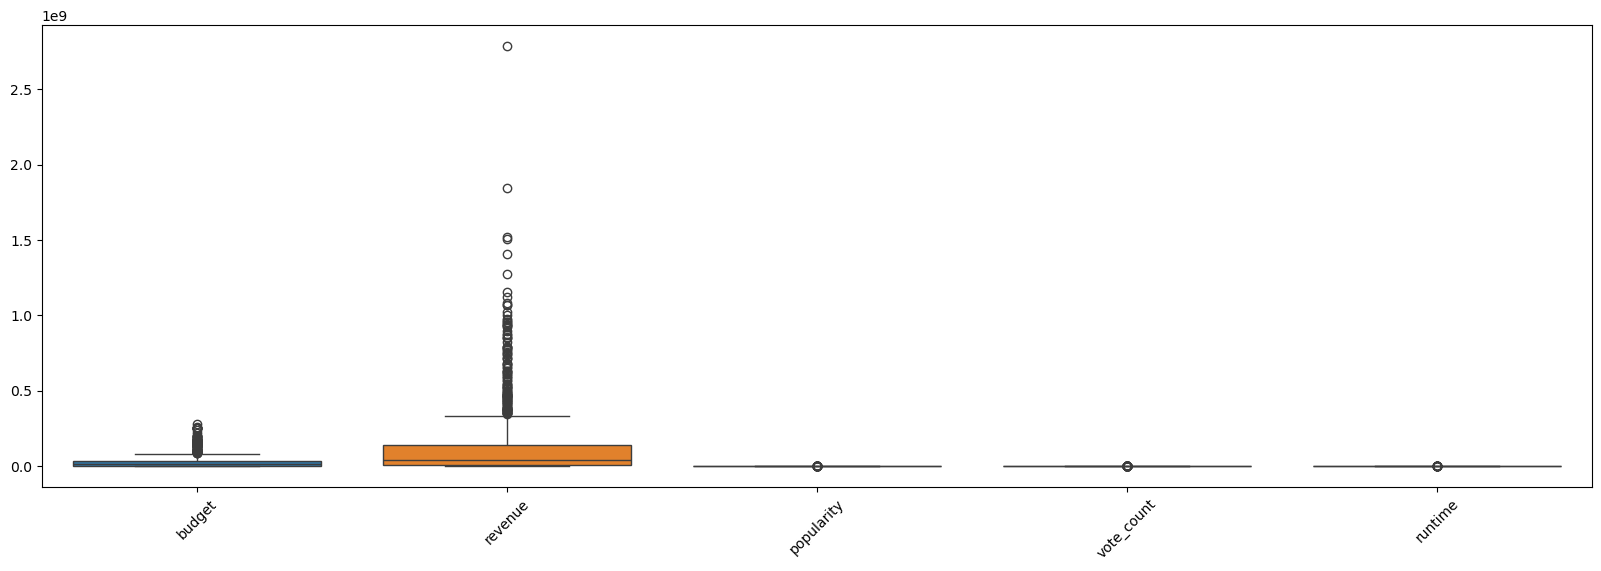

In [441]:
sns.boxplot(data=top_rated[["budget","revenue","popularity","vote_count","runtime"]])  
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45)
plt.show()

In [442]:
import numpy as np

top_rated["budget"] = np.log1p(top_rated["budget"])
top_rated["runtime"] = np.log1p(top_rated["runtime"])
top_rated["popularity"] = np.log1p(top_rated["popularity"])
top_rated["vote_count"] = np.log1p(top_rated["vote_count"])
top_rated["revenue"] = np.log1p(top_rated["revenue"])

#### Reduce skewness:  Log transformation compresses large values and helps to normalize the distribution.



### Features scaling


In [443]:
from sklearn.preprocessing import StandardScaler  # Help  removing the mean and scaling to unit variance. Mean = 0/Standard deviation = 1

In [444]:
scale=StandardScaler()

In [445]:
scale_data4=scale.fit_transform(top_rated)

In [446]:
scale_data4=pd.DataFrame(scale_data4,columns=top_rated.columns)
scale_data4

,budget,popularity,revenue,runtime,vote_count,target_genres,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,...,has_actor_James Doohan,has_actor_Robert De Niro,has_actor_DeForest Kelley,has_actor_William Shatner,has_actor_George Takei,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos
0,1,2,1,1,2,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
1,1,1,1,1,2,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
2,1,1,1,-1,1,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
3,1,2,1,1,1,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
4,1,1,1,1,1,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-1,-2,-0,-0,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,0,-1
984,-2,-2,-2,-1,-3,1,3,-0,-0,-0,...,9,-0,9,9,9,-0,-0,-0,0,1
985,-2,-2,-2,0,-2,-1,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
986,0,-2,-2,-0,-2,0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,2,-0


### Feature Selection- Detect multicollinearity

In [447]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [448]:
def calculate_vif(x):
    vif=pd.Series(name="VIF")
    for i in range(0,x.shape[1]):
        vif[x.columns[i]]=variance_inflation_factor(x.values,i)
    return vif

In [449]:
dq=scale_data4

In [450]:
vif_values4=calculate_vif(dq.copy())

In [451]:
vif_values4[0:60]

budget                                                 2
popularity                                            12
revenue                                                2
runtime                                                1
vote_count                                            13
target_genres                                          1
has_company_Paramount Pictures                         1
has_company_Universal Pictures                         1
has_company_Columbia Pictures                          1
has_company_Twentieth Century Fox Film Corporation     1
has_company_Walt Disney Pictures                       1
has_company_United Artists                             1
has_company_New Line Cinema                            1
has_company_Miramax Films                              1
has_company_Warner Bros.                               1
has_company_Fox Searchlight Pictures                   1
is_english                                             2
has_country_United States of Am

In [452]:
vif_values4[60:70]

Series([], Name: VIF, dtype: float64)

In [453]:
scale_data4.drop(["vote_count","has_actor_DeForest Kelley","has_actor_James Doohan","has_actor_Leonard Nimoy","has_actor_George Takei"], axis=1, inplace=True)


In [454]:
# Check again after delete multicollinearity columns

In [455]:
drl=scale_data4

In [456]:
vif_values4=calculate_vif(drl.copy())

In [457]:
vif_values4[0:60]

budget                                               2
popularity                                           2
revenue                                              2
runtime                                              1
target_genres                                        1
has_company_Paramount Pictures                       1
has_company_Universal Pictures                       1
has_company_Columbia Pictures                        1
has_company_Twentieth Century Fox Film Corporation   1
has_company_Walt Disney Pictures                     1
has_company_United Artists                           1
has_company_New Line Cinema                          1
has_company_Miramax Films                            1
has_company_Warner Bros.                             1
has_company_Fox Searchlight Pictures                 1
is_english                                           2
has_country_United States of America                 4
has_country_United Kingdom                           3
has_countr

In [458]:
vif_values4[60:70]

Series([], Name: VIF, dtype: float64)

In [459]:
scale_data4.head()

,budget,popularity,revenue,runtime,target_genres,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,has_company_Walt Disney Pictures,...,is_director_Ridley Scott,is_director_Robert Zemeckis,has_actor_Tom Hanks,has_actor_Robert De Niro,has_actor_William Shatner,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos
0,1,2,1,1,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
1,1,1,1,1,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1
2,1,1,1,-1,-1,-0,-0,-0,-0,6,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,1
3,1,2,1,1,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,1,-1
4,1,1,1,1,-1,-0,-0,-0,-0,-0,...,-0,-0,-0,-0,-0,-0,-0,-0,-1,-1


### Elbow method Help to Find K value

In [460]:
from sklearn.cluster import KMeans

In [461]:
wcss=[]
for i in range(2,21):
    modelk=KMeans(n_clusters=i,init="k-means++")
    modelk.fit(scale_data4)
    wcss.append(modelk.inertia_)

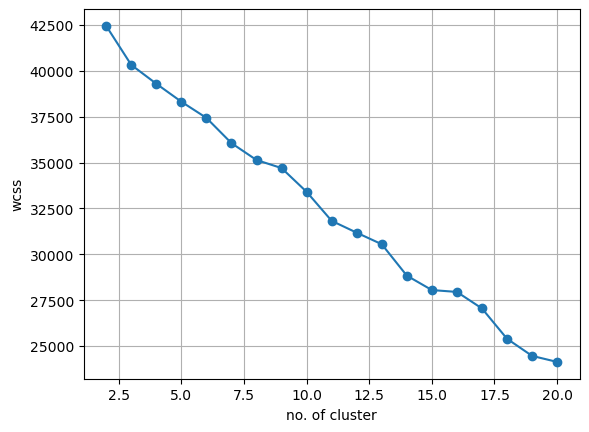

In [462]:
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xlabel("no. of cluster")
plt.ylabel("wcss")
plt.grid()
plt.show()

X-axis: Number of clusters (from 2 to 20)

Y-axis: WCSS (Within-Cluster Sum of Squares)

WCSS decreases as the number of clusters increases — expected behavior.

There's a visible "bend" or "elbow" around k = 4 to 5, which usually indicates an optimal number of clusters before diminishing returns set in.

### Sihouette score

In [463]:
from sklearn.metrics import silhouette_score


In [464]:
silhouette_scores = []

for i in range(2,21):
    modelk=KMeans(n_clusters=i,init="k-means++",random_state=42)
    cluster_labels=modelk.fit_predict(scale_data4)
    silhouette_avg=round(silhouette_score(scale_data4,cluster_labels),3)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.065
For n_clusters = 3 The average silhouette_score is : 0.076
For n_clusters = 4 The average silhouette_score is : 0.092
For n_clusters = 5 The average silhouette_score is : 0.104
For n_clusters = 6 The average silhouette_score is : 0.11
For n_clusters = 7 The average silhouette_score is : 0.12
For n_clusters = 8 The average silhouette_score is : 0.121
For n_clusters = 9 The average silhouette_score is : 0.129
For n_clusters = 10 The average silhouette_score is : 0.141
For n_clusters = 11 The average silhouette_score is : 0.145
For n_clusters = 12 The average silhouette_score is : 0.146
For n_clusters = 13 The average silhouette_score is : 0.156
For n_clusters = 14 The average silhouette_score is : 0.168
For n_clusters = 15 The average silhouette_score is : 0.174
For n_clusters = 16 The average silhouette_score is : 0.186
For n_clusters = 17 The average silhouette_score is : 0.195
For n_clusters = 18 The average silhouette_score i

Cluster 7 is a better option as per silhouette_score and Elbow method

### Build Model K-Means clustering

In [465]:
actual_model=KMeans(n_clusters=7,init='k-means++',n_init=20,random_state=42)

In [466]:
actual_model.fit(scale_data4)

KMeans(n_clusters=7, n_init=20, random_state=42)

In [467]:
labels=actual_model.labels_
labels

array([3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 6, 3, 3, 4, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 6, 2, 6,
       3, 6, 3, 3, 6, 3, 3, 4, 4, 3, 3, 4, 0, 6, 3, 3, 3, 6, 6, 3, 3, 3,
       3, 4, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 6, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 4, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 3, 0, 3,
       3, 3, 3, 6, 3, 0, 3, 3, 3, 5, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 6, 3, 0, 3, 0,
       3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 2, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 6, 5, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,

### Evaluating Model Performance

In [468]:
silhouette_a = silhouette_score(scale_data4,labels)
print(f"Silhouette Score for KMeans with k=7: {silhouette_a:.2f}")

Silhouette Score for KMeans with k=7: 0.11


#### CHI (Calinski-Harabasz Index)

In [469]:
from sklearn.metrics import calinski_harabasz_score

# Assuming you have your data (X) and cluster labels (labels)
ch_index = calinski_harabasz_score(scale_data4, labels)

print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Calinski-Harabasz Index: 34.38


This is used to compare different k values. Higher is better.

#### Davies-Bouldin index 

In [470]:
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(scale_data4, labels)
print(f"Davies-Bouldin index : {db_score:.2f}")

Davies-Bouldin index : 1.95


###### Lower is better

### Graphical reprsentaion of cluster

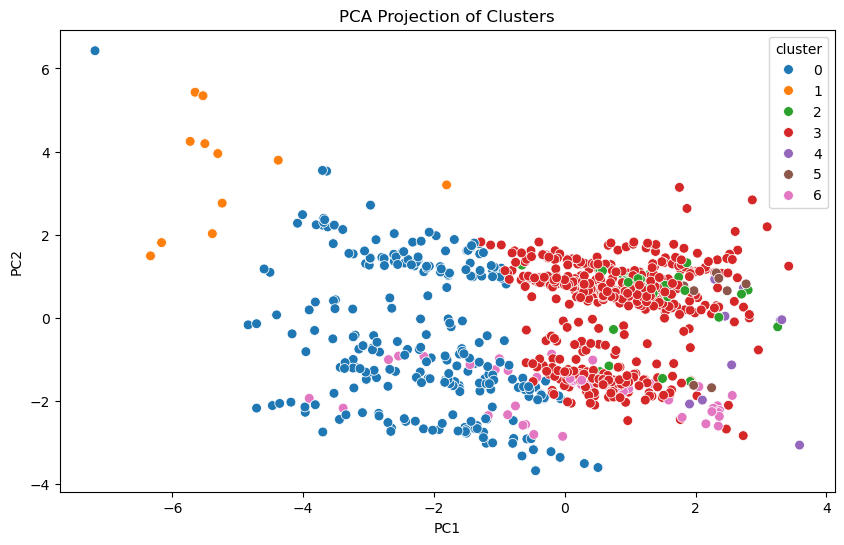

In [471]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scale_data4)

# Step 2: Create DataFrame with cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = actual_model.labels_

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10', s=50)
plt.title('PCA Projection of Clusters')
plt.show()

### Put cluster labels in actual dataset

In [472]:
top_rated_original = top_rated.copy()


In [473]:
top_rated_original['cluster'] = actual_model.labels_      # made a new column


In [474]:
top_rated_original.head()

,budget,popularity,revenue,runtime,vote_count,target_genres,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,...,has_actor_Robert De Niro,has_actor_DeForest Kelley,has_actor_William Shatner,has_actor_George Takei,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos,cluster
0,19,5,22,5,9,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,1,3
3,19,5,21,5,9,0,0,0,0,0,...,0,0,0,0,0,0,0,-0,-1,3
6,19,4,20,5,8,2,0,0,0,0,...,0,0,0,0,0,0,0,-1,1,3
7,19,5,21,5,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0,3
8,19,5,21,5,9,1,0,0,0,0,...,0,0,0,0,0,0,0,-0,-1,3


### Number of movie in each cluster

Text(0.5, 1.0, 'Number of Movies in Each Cluster')

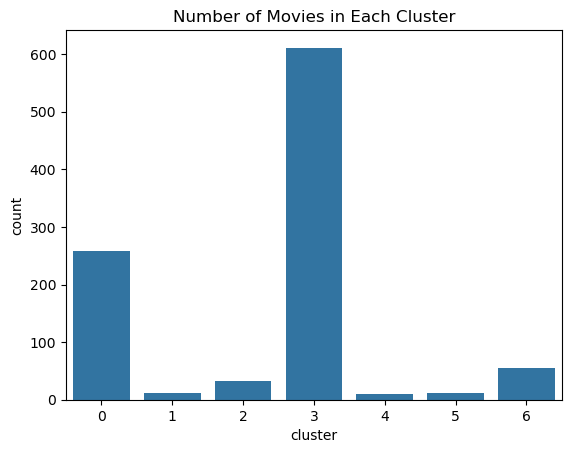

In [475]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=top_rated_original, x='cluster')
plt.title("Number of Movies in Each Cluster")

Cluster 0: Approximately 260-270 movies.

Cluster 1: Very few movies, looks like less than 10.

Cluster 2: Around 30-40 movies.

Cluster 3: The largest cluster, with over 600 movies (around 610-620).

Cluster 4: Very few movies, looks like less than 10.

Cluster 5: Very few movies, looks like less than 10.

Cluster 6: Around 50-60 movies.

### Change log value to actual value

In [476]:
top_rated_original["budget"] = np.expm1(top_rated_original["budget"])
top_rated_original["revenue"] = np.expm1(top_rated_original["revenue"])
top_rated_original["popularity"] = np.expm1(top_rated_original["popularity"])
top_rated_original["runtime"] = np.expm1(top_rated_original["runtime"])


In [477]:
top_rated_original.head()

,budget,popularity,revenue,runtime,vote_count,target_genres,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,...,has_actor_Robert De Niro,has_actor_DeForest Kelley,has_actor_William Shatner,has_actor_George Takei,has_actor_Denzel Washington,has_actor_Leonardo DiCaprio,has_actor_Johnny Depp,month_sin,month_cos,cluster
0,"237,000,000",150,"2,787,965,087",162,9,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,1,3
3,"250,000,000",112,"1,084,939,099",165,9,0,0,0,0,0,...,0,0,0,0,0,0,0,-0,-1,3
6,"260,000,000",49,"591,794,936",100,8,2,0,0,0,0,...,0,0,0,0,0,0,0,-1,1,3
7,"280,000,000",134,"1,405,403,694",141,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0,3
8,"250,000,000",99,"933,959,197",153,9,1,0,0,0,0,...,0,0,0,0,0,0,0,-0,-1,3


### Find Patterns between columns

##### Numerical columns

In [478]:
top_rated_original.groupby("cluster")[["budget", "revenue", "popularity", "runtime"]].mean()


,budget,revenue,popularity,runtime
cluster,,,,
0,"5,225,423","13,591,278",11,111
1,"1,178,455","8,800,000",2,95
2,"33,440,625","196,468,300",63,119
3,"36,787,260","171,277,595",46,122
4,"103,800,000","350,494,066",79,154
5,"28,845,455","81,265,438",36,148
6,"50,326,364","213,065,006",44,129


Cluster 4 = Top Rated Films
Most facilities/features: Highest budget - Highest revenue - Highest popularity - Longest runtime

Cluster	                                     Insights

0	        Low-budget, low-revenue, average popularity movies. Likely indie or nichecontent.

1	        Very low-budget and very low popularity. Possibly short films or limited release art films.

2	        Mid-high budget and very high popularity. Likely successful mainstream films.

3	        Similar to Cluster 2, slightly less popular. Still highly successful.

4	        Top blockbuster films – high budget, high revenue, long runtime. Likely award-winners/franchise hits.

5	        Medium-scale films with decent popularity and long runtime. Maybe biopics or historical dramas.

6	        Commercially strong films – not as massive as Cluster 4 but successful.



##### Genre Columns

In [484]:
top_rated_original.groupby("cluster")["target_genres"].sum().astype(int)


cluster
0    1438
1      65
2     157
3    3488
4      64
5      52
6     242
Name: target_genres, dtype: int32

Cluster 3 has the most genres (3,488) - Likely top-rated multi-genre films (e.g., Action-Comedy, Drama-Thriller), widely appealing, and rich in content.

Cluster 4, despite being the highest in budget and popularity, has only 64 genre assignments - These may be genre-specialist blockbusters, e.g., pure Sci-Fi or Action.

Cluster 1, 4, 5 show low genre counts, possibly indicating focused storytelling or niche appeal.

##### Director columns

In [486]:
director_cols=["is_director_Steven Spielberg","is_director_Martin Scorsese","is_director_Clint Eastwood","is_director_David Fincher","is_director_Quentin Tarantino","is_director_Woody Allen","is_director_Christopher Nolan","is_director_Peter Jackson","is_director_Ridley Scott","is_director_Robert Zemeckis"]

In [487]:
top_rated_original.groupby("cluster")[director_cols].sum().astype(int)


,is_director_Steven Spielberg,is_director_Martin Scorsese,is_director_Clint Eastwood,is_director_David Fincher,is_director_Quentin Tarantino,is_director_Woody Allen,is_director_Christopher Nolan,is_director_Peter Jackson,is_director_Ridley Scott,is_director_Robert Zemeckis
cluster,,,,,,,,,,
0,4,2,0,0,0,3,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,2,0
3,14,4,11,6,7,5,6,0,1,6
4,1,5,0,0,0,0,1,0,0,0
5,0,5,0,0,0,0,0,0,0,0
6,0,0,0,1,1,0,0,7,3,0


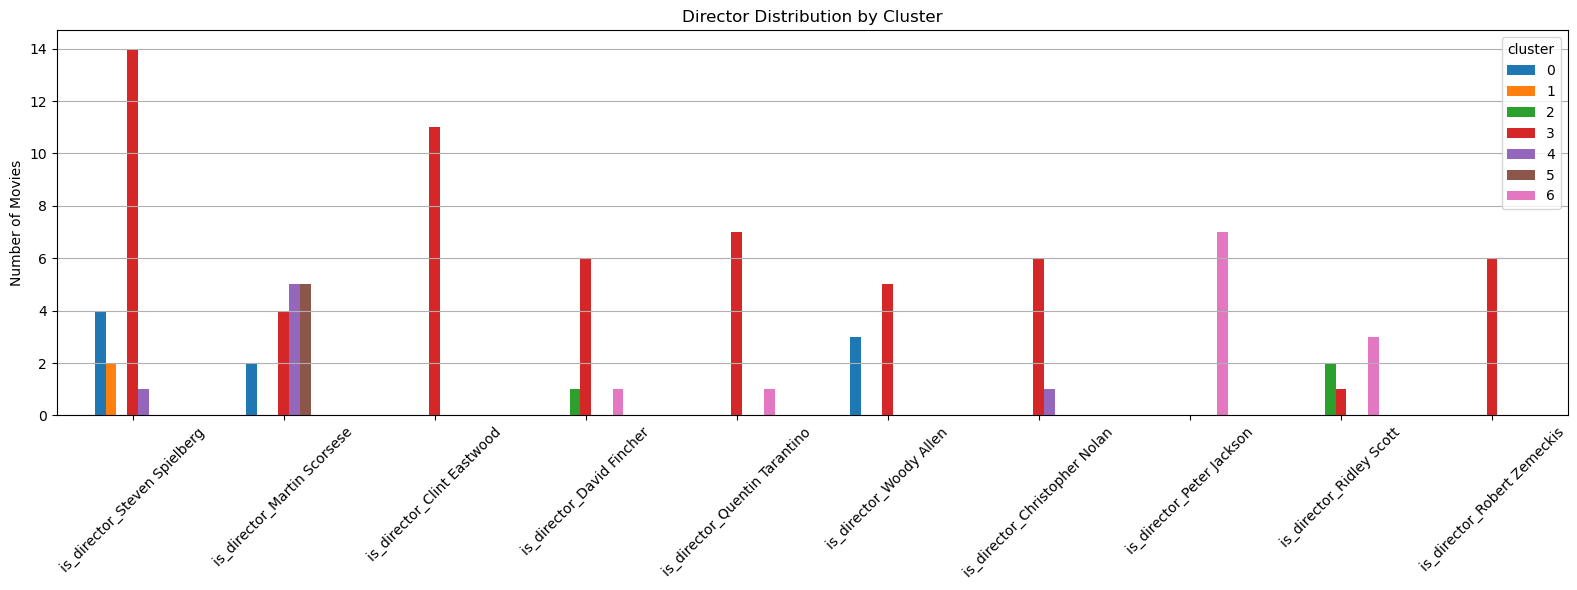

In [488]:
import matplotlib.pyplot as plt

cluster_genre_counts = top_rated_original.groupby("cluster")[director_cols].sum().T
cluster_genre_counts.plot(kind='bar', figsize=(16, 6))
plt.title("Director Distribution by Cluster")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Cluster 3 = High-quality, critically acclaimed, director-driven cinema.

Matches with its highest genre diversity (3,488 total genre tags).

Also strong in runtime and revenue.

Cluster 4 = High-budget blockbusters, but not necessarily director-heavy.

Likely big studio/franchise films (e.g., Marvel, animated, etc.).

Cluster 6 = A mix of epic storytelling, potentially fantasy/adventure.

Strong Peter Jackson presence (likely Lord of the Rings/Hobbit type).

##### Country columns

In [489]:
country_col=["has_country_United States of America","has_country_United Kingdom","has_country_Germany","has_country_France","has_country_Canada","has_country_India","has_country_Spain","has_country_Australia","has_country_Japan","has_country_Italy"]   

In [490]:
top_rated_original.groupby("cluster")[country_col].sum().astype(int)


,has_country_United States of America,has_country_United Kingdom,has_country_Germany,has_country_France,has_country_Canada,has_country_India,has_country_Spain,has_country_Australia,has_country_Japan,has_country_Italy
cluster,,,,,,,,,,
0,88,25,0,26,9,9,13,3,9,8
1,8,0,0,1,0,1,0,0,0,0
2,27,3,0,1,0,0,0,0,0,0
3,458,74,0,11,21,6,1,10,4,4
4,6,1,1,0,1,0,0,0,0,0
5,9,1,0,1,0,0,0,0,0,0
6,0,3,45,0,0,0,0,0,0,0


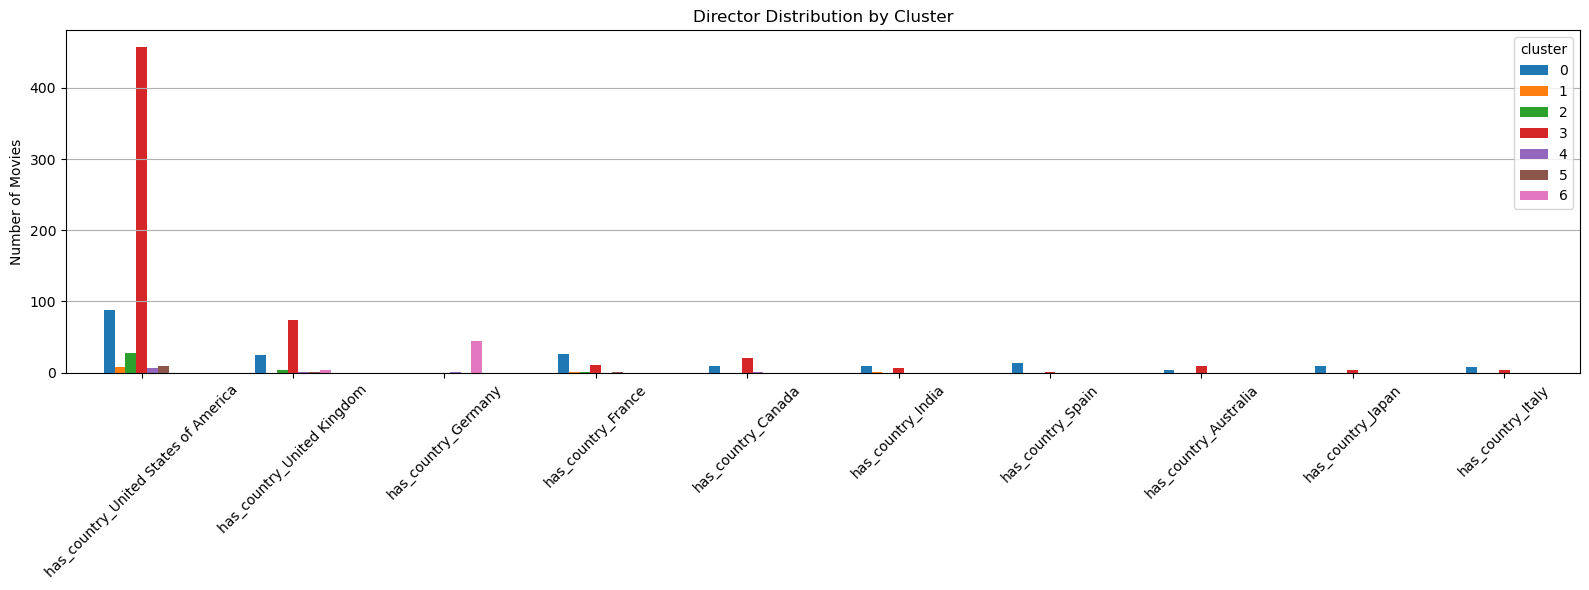

In [491]:
import matplotlib.pyplot as plt

cluster_genre_counts = top_rated_original.groupby("cluster")[country_col].sum().T
cluster_genre_counts.plot(kind='bar', figsize=(16, 6))
plt.title("Director Distribution by Cluster")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Cluster 3 is USA-dominated, director-rich, and genre-diverse — most likely houses top-rated original films with wide appeal and critical success.

Cluster 0 brings in global contributions, possibly representing international critically acclaimed films with modest budgets and popularity. in medium/low-budget clusters

##### Company column

In [492]:
company_col=["has_company_Paramount Pictures","has_company_Universal Pictures","has_company_Columbia Pictures","has_company_Twentieth Century Fox Film Corporation","has_company_Walt Disney Pictures","has_company_United Artists","has_company_New Line Cinema","has_company_Miramax Films","has_company_Warner Bros.","has_company_Fox Searchlight Pictures"]

In [493]:
top_rated_original.groupby("cluster")[company_col].sum().astype(int)


,has_company_Paramount Pictures,has_company_Universal Pictures,has_company_Columbia Pictures,has_company_Twentieth Century Fox Film Corporation,has_company_Walt Disney Pictures,has_company_United Artists,has_company_New Line Cinema,has_company_Miramax Films,has_company_Warner Bros.,has_company_Fox Searchlight Pictures
cluster,,,,,,,,,,
0,40,0,3,0,0,2,2,3,2,2
1,9,0,0,0,0,0,0,0,0,0
2,0,0,0,32,0,0,0,0,0,0
3,45,45,44,0,27,22,24,16,20,15
4,2,0,0,0,0,0,0,2,0,0
5,0,4,1,0,0,1,0,0,1,0
6,3,4,2,0,0,2,0,0,0,0


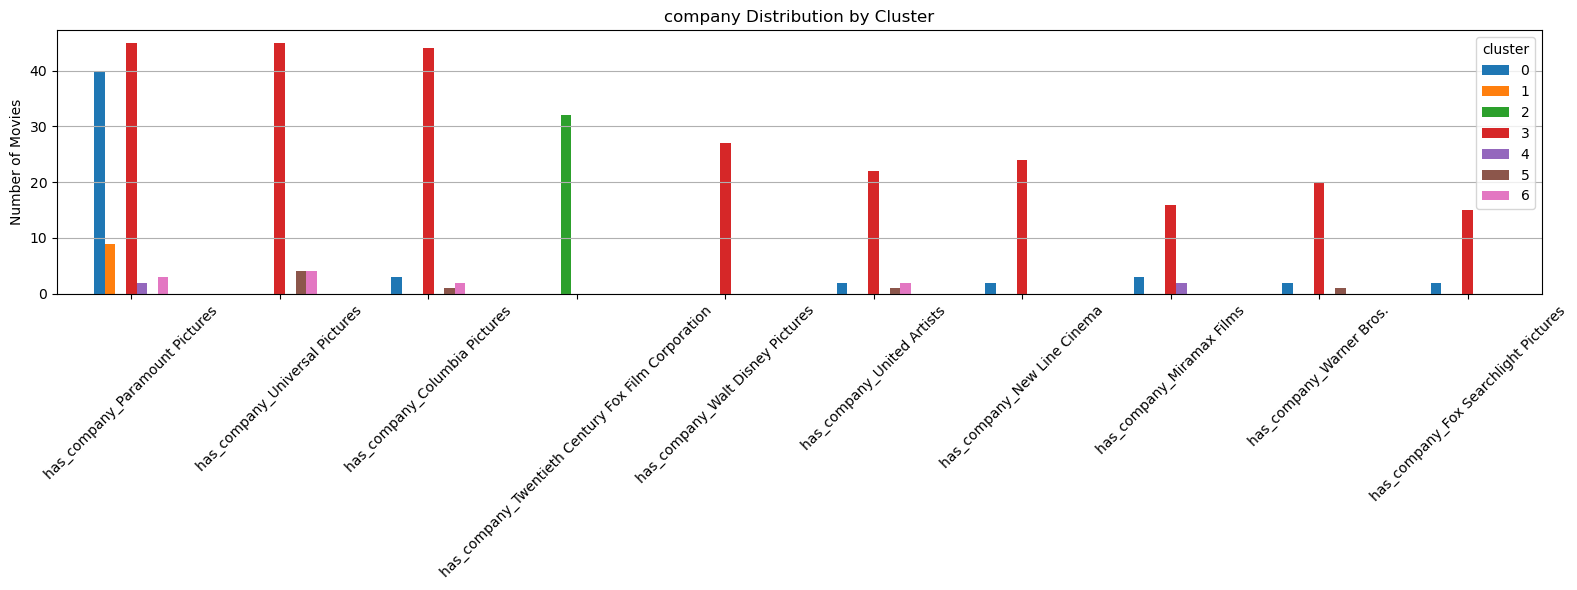

In [494]:
import matplotlib.pyplot as plt

cluster_genre_counts = top_rated_original.groupby("cluster")[company_col].sum().T
cluster_genre_counts.plot(kind='bar', figsize=(16, 6))
plt.title("company Distribution by Cluster")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Cluster	Interpretation

3	= Highest (most studios)	Mainstream, successful, critically acclaimed films

0	= Moderate	Likely older/classic studio films

2	= Mainly Fox	Fox-driven popular films

4	= Very low	High-budget, big hits but not from these listed top 10 companies

5 & 6 = 	Low	Possibly indie, niche, or non-US focused films

### Final Interpretation

##### Facilities / Features of Top-Rated Films
1. Strong Budget Support :- Top-rated films — especially in Clusters 3, 4, 2, and 6 — generally enjoy medium to high budgets, enabling them to:

Hire top actors/directors,Use better production quality (VFX, sound, editing),Promote films internationally

Cluster 4 leads in budget and revenue, indicating big-budget blockbusters


2. Renowned Directors :- Cluster 3 stands out with films by legends like:

Steven Spielberg, Christopher Nolan, Quentin Tarantino, Martin Scorsese, David Fincher

A strong director usually brings: Storytelling expertise, Fanbase and media attention,More award-worthy or festival-suited films

3. Popular Genres :- Top-rated clusters (especially Cluster 3) show high presence of genres like:

Drama (emotional depth),Thriller / Action / Sci-Fi (mass appeal),Romance / Comedy (broad audience reach)

Cluster 3 had the highest genre count, suggesting multi-genre richness and wider appeal.

4. Longer Runtime :- Top-rated films typically exceed 120 minutes, especially in Clusters:

4, 3, 6 – supporting richer plots and deeper character developmentExample: Directors like Nolan and Jackson prefer long-form storytelling

5. High Popularity & Audience Reach :- Clusters like 3 and 4 have very high popularity scores, reflecting:

Strong marketing & audience engagement,Positive reviews, ratings, and buzz,High probability of viral or franchise success

6. Big Production Companies :- Films backed by companies like:

Paramount, Universal, Columbia, Disney, Warner Bros., 20th Century Fox

Especially in Cluster 3, this backing ensures:- Wide release networks, Brand reputation & trust, Access to top resources and talent.

7. Origin from Film-Strong Countries Mostly from:- 🇺🇸 USA  (dominant in Cluster 3) ,🇬🇧 UK, 🇯🇵 Japan, 🇫🇷 France

These countries have: Well-established film industries and Skilled technical teams

#### Final Note: Cluster 3 is the Gold Standard
Highest in: director presence, genre richness, production company backing, and country concentration

Represents the ideal mix of creativity, budget, talent, and audience connection seen in most top-rated original films

